## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:.
A straight-plane fit is a model of the form

$$
\large y = \large \beta + \large \alpha_1 x_1 + \large \alpha_2 x_2 +...+ \large \alpha_n x_n
$$

where:
<br>$\alpha_i$ is commonly known as the *slope* in multiple dimensions that makes up a plane
<br>$\beta$ is commonly known as the *intercept*. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Code Dictionary
code | description
-----|------------
`read_csv(file)` | Using the Pandas library, create a dataframe for the dataset
`.loc()` | Access a group of rows and columns by label(s) or a boolean array.
`.get_dummies()` | Convert categorical variable into dummy/indicator variables
`.concat()` | Concatenate pandas dataframes along a particular axis.
`statsmodels` | Library for in depth statistical analysis.
`.OLS(y, X)` | Ordinary least squares aka linear regression.
`.RFECV(model, folds)` | Automatic selection of the best number of features.

We Load our data in pandas as a dataframe first

In [2]:
dataset = pd.read_csv('pggm_dataset.csv')

Then we explore the data set

In [3]:
dataset.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


We Inspect the dataset for missing elements

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

We Delete all rows with missing elements

In [5]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38026 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38026 non-null object
Name                     38026 non-null object
Period                   38026 non-null object
Period_YYYYMMDD          38026 non-null int64
Ticker                   38026 non-null object
Universe_Returns_F1W     38026 non-null float64
Universe_Returns_F4W     38026 non-null float64
Universe_Returns_F12W    38026 non-null float64
Weight                   38026 non-null float64
GICS_Sector              38026 non-null object
GICS_Ind_Grp             38026 non-null object
Market_Cap_USD           38026 non-null float64
Price_USD                38026 non-null float64
NTM_EP                   38026 non-null float64
LTM_ROA                  38026 non-null float64
BP                       38026 non-null float64
LTM_EP                   38026 non-null float64
5Y_Sales_Growth          38026 non-null float64
dtypes: float64(11), int64(1), obje

Seperate out the target variable and features

In [6]:
X = dataset.loc[:, dataset.columns != '5Y_Sales_Growth']
y = dataset['5Y_Sales_Growth']

create the dummy variable from categorical variable

In [7]:
dummies = pd.get_dummies(X['GICS_Sector'], prefix='Sector_')
dummies.head()

,Sector__Communication Services,Sector__Consumer Discretionary,Sector__Consumer Staples,Sector__Energy,Sector__Financials,Sector__Health Care,Sector__Industrials,Sector__Information Technology,Sector__Materials,Sector__Real Estate,Sector__Utilities
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


Replace the categorical variable with the newly derived variable

In [8]:
X = pd.concat([X.loc[:, X.columns != 'GICS_Sector'], dummies], axis=1)

In [9]:
X.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Ind_Grp,...,Sector__Consumer Discretionary,Sector__Consumer Staples,Sector__Energy,Sector__Financials,Sector__Health Care,Sector__Industrials,Sector__Information Technology,Sector__Materials,Sector__Real Estate,Sector__Utilities
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Commercial & Professional Services,...,0,0,0,0,0,1,0,0,0,0
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,...,0,0,0,0,0,0,0,0,0,1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Capital Goods,...,0,0,0,0,0,1,0,0,0,0
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Capital Goods,...,0,0,0,0,0,1,0,0,0,0
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X = X.drop(['Sector__Materials','Sector__Information Technology', 'Sector__Health Care','Identifier','Name', 'Period', 'GICS_Ind_Grp', 'Ticker']  , axis=1)
X.head()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,Sector__Communication Services,Sector__Consumer Discretionary,Sector__Consumer Staples,Sector__Energy,Sector__Financials,Sector__Industrials,Sector__Real Estate,Sector__Utilities
0,20141231,-2.517855,-0.121111,4.156041,0.000402,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,0,0,0,0,0,1,0,0
1,20141231,2.036428,6.307948,-8.426744,0.000422,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,0,0,0,0,0,0,0,1
2,20141231,-0.396162,-1.283580,-0.753021,0.000563,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,0,0,0,0,0,1,0,0
3,20141231,-1.973909,1.669562,1.815629,0.005174,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,0,0,0,0,0,1,0,0
4,20141231,1.118696,7.679176,-6.160975,0.000616,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,0,0,0,0,0,0,0,1


We then create a random split of our data set with one third as test data set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

$$
\large y = \large \beta + \large \alpha_1 x_1 + \large \alpha_2 x_2 +...+ \large \alpha_n x_n
$$


$x_i$ represents the feature which in our case is R&D SPend, Admininstration etc. 

Then, fit the model to all the features in the data

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Finally, make some predictions

In [14]:
y_pred = regressor.predict(X_test)

How to select the most relevant features for prediction

In [15]:
from sklearn.feature_selection import RFECV

In [16]:
lr = LinearRegression()
selector = RFECV(lr,cv=10) # 10 fold cross validation
selector.fit(X_train, y_train)

RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

![Cross Validation](../../img/cross.jpg)

In [17]:
optimized_columns = X_train.columns[selector.support_]
optimized_columns

Index(['Weight'], dtype='object')

In [18]:
selector.ranking_

array([19, 15, 16, 14,  1, 18, 17,  2, 10,  5,  3,  8, 12, 13,  6,  9, 11,
        4,  7])

In [19]:
import statsmodels.formula.api as sm

In [20]:
X['constant'] = np.ones(len(X)).astype(int)
X.head()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,Sector__Communication Services,Sector__Consumer Discretionary,Sector__Consumer Staples,Sector__Energy,Sector__Financials,Sector__Industrials,Sector__Real Estate,Sector__Utilities,constant
0,20141231,-2.517855,-0.121111,4.156041,0.000402,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,0,0,0,0,0,1,0,0,1
1,20141231,2.036428,6.307948,-8.426744,0.000422,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,0,0,0,0,0,0,0,1,1
2,20141231,-0.396162,-1.283580,-0.753021,0.000563,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,0,0,0,0,0,1,0,0,1
3,20141231,-1.973909,1.669562,1.815629,0.005174,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,0,0,0,0,0,1,0,0,1
4,20141231,1.118696,7.679176,-6.160975,0.000616,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,0,0,0,0,0,0,0,1,1


In [21]:
X_opt = X

In [22]:
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()

In [23]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:22:07   Log-Likelihood:            -2.7065e+05
No. Observations:               38026   AIC:                         5.413e+05
Df Residuals:                   38006   BIC:                         5.415e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Period_YYYYMMDD                    0.0003      0.000      1.126      0.260      -0.000       0.001
Universe_Returns_F1W              -0.0013      0.438     -0.003      0.998      -0.860       0.858
Universe_Returns_F4W              -0.1630      0.274     -0.595      0.552      -0.700       0.374
Universe_Returns_F12W             -1.4184      0.159     -8.908      0.000      -1.730      -1.106
Weight                          1.706e+04   7883.657      2.164      0.031    1604.712    3.25e+04
Market_Cap_USD                    -0.0007      0.000     -2.148      0.032      -0.001   -6.11e-05
Price_USD                          0.0166      0.009      1.820      0.069      -0.001       0.035
NTM_EP                         -1599.2374     60.742    -26.328      0.000   -1718.293   -1480.181
LTM_ROA                          -13.3212      0.267    -49.880      0.000     -13.845     -12.798
BP                               -51.2495      6.736     -7.609      0.000     -64.451     -38.048
LTM_EP                           625.6956     33.596     18.624      0.000     559.846     691.545
Sector__Communication Services   -52.9032     13.913     -3.802      0.000     -80.173     -25.633
Sector__Consumer Discretionary    -4.8772      4.786     -1.019      0.308     -14.257       4.503
Sector__Consumer Staples          -4.2385      7.018     -0.604      0.546     -17.994       9.517
Sector__Energy                   -63.3505      7.134     -8.880      0.000     -77.334     -49.367
Sector__Financials               -35.2017      5.520     -6.378      0.000     -46.020     -24.383
Sector__Industrials              -10.6295      5.005     -2.124      0.034     -20.439      -0.820
Sector__Real Estate              -96.5950      7.370    -13.106      0.000    -111.041     -82.149
Sector__Utilities                -66.1345      7.543     -8.768      0.000     -80.919     -51.350
constant                       -5019.7657   4640.066     -1.082      0.279   -1.41e+04    4074.887
==============================================================================
Omnibus:                   106883.195   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3907049094.716
Skew:                          37.164   Prob(JB):                         0.00
Kurtosis:                    1571.566   Cond. No.                     1.07e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_opt = X_opt.drop('Sector__Communication Services', axis=1)

In [25]:
X_opt.head()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,Sector__Consumer Discretionary,Sector__Consumer Staples,Sector__Energy,Sector__Financials,Sector__Industrials,Sector__Real Estate,Sector__Utilities,constant
0,20141231,-2.517855,-0.121111,4.156041,0.000402,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,0,0,0,0,1,0,0,1
1,20141231,2.036428,6.307948,-8.426744,0.000422,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,0,0,0,0,0,0,1,1
2,20141231,-0.396162,-1.283580,-0.753021,0.000563,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,0,0,0,0,1,0,0,1
3,20141231,-1.973909,1.669562,1.815629,0.005174,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,0,0,0,0,1,0,0,1
4,20141231,1.118696,7.679176,-6.160975,0.000616,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,0,0,0,0,0,0,1,1


In [26]:
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:22:07   Log-Likelihood:            -2.7065e+05
No. Observations:               38026   AIC:                         5.413e+05
Df Residuals:                   38007   BIC:                         5.415e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Period_YYYYMMDD                    0.0002      0.000      1.032      0.302      -0.000       0.001
Universe_Returns_F1W               0.0158      0.438      0.036      0.971      -0.843       0.875
Universe_Returns_F4W              -0.1671      0.274     -0.610      0.542      -0.704       0.370
Universe_Returns_F12W             -1.4205      0.159     -8.919      0.000      -1.733      -1.108
Weight                          1.603e+04   7880.381      2.034      0.042     579.376    3.15e+04
Market_Cap_USD                    -0.0007      0.000     -2.031      0.042      -0.001   -2.31e-05
Price_USD                          0.0179      0.009      1.955      0.051   -4.76e-05       0.036
NTM_EP                         -1571.1215     60.301    -26.055      0.000   -1689.313   -1452.930
LTM_ROA                          -13.2985      0.267    -49.798      0.000     -13.822     -12.775
BP                               -54.9578      6.666     -8.245      0.000     -68.023     -41.893
LTM_EP                           607.9048     33.275     18.269      0.000     542.686     673.124
Sector__Consumer Discretionary    -2.7589      4.754     -0.580      0.562     -12.077       6.559
Sector__Consumer Staples          -1.7709      6.989     -0.253      0.800     -15.470      11.928
Sector__Energy                   -60.2747      7.090     -8.502      0.000     -74.171     -46.379
Sector__Financials               -31.7118      5.444     -5.825      0.000     -42.382     -21.042
Sector__Industrials               -8.5187      4.975     -1.712      0.087     -18.270       1.232
Sector__Real Estate              -93.1655      7.316    -12.734      0.000    -107.505     -78.826
Sector__Utilities                -62.9874      7.499     -8.400      0.000     -77.685     -48.289
constant                       -4589.4525   4639.507     -0.989      0.323   -1.37e+04    4504.104
==============================================================================
Omnibus:                   106907.722   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3912889564.818
Skew:                          37.186   Prob(JB):                         0.00
Kurtosis:                    1572.738   Cond. No.                     1.07e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_opt = X_opt.drop('Sector__Consumer Discretionary', axis=1)

In [28]:
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:22:07   Log-Likelihood:            -2.7065e+05
No. Observations:               38026   AIC:                         5.413e+05
Df Residuals:                   38008   BIC:                         5.415e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Period_YYYYMMDD              0.0002      0.000      1.045      0.296      -0.000       0.001
Universe_Returns_F1W         0.0140      0.438      0.032      0.975      -0.845       0.873
Universe_Returns_F4W        -0.1669      0.274     -0.609      0.542      -0.704       0.370
Universe_Returns_F12W       -1.4190      0.159     -8.911      0.000      -1.731      -1.107
Weight                    1.609e+04   7879.630      2.041      0.041     641.033    3.15e+04
Market_Cap_USD              -0.0007      0.000     -2.034      0.042      -0.001   -2.42e-05
Price_USD                    0.0174      0.009      1.911      0.056      -0.000       0.035
NTM_EP                   -1572.1793     60.273    -26.084      0.000   -1690.316   -1454.043
LTM_ROA                    -13.3084      0.266    -49.938      0.000     -13.831     -12.786
BP                         -55.1263      6.659     -8.278      0.000     -68.179     -42.074
LTM_EP                     607.3862     33.262     18.260      0.000     542.191     672.581
Sector__Consumer Staples    -0.8761      6.817     -0.129      0.898     -14.237      12.485
Sector__Energy             -59.4253      6.937     -8.567      0.000     -73.022     -45.829
Sector__Financials         -30.7602      5.191     -5.926      0.000     -40.935     -20.586
Sector__Industrials         -7.5925      4.712     -1.611      0.107     -16.828       1.643
Sector__Real Estate        -92.3159      7.168    -12.879      0.000    -106.366     -78.266
Sector__Utilities          -62.1009      7.342     -8.459      0.000     -76.491     -47.711
constant                 -4647.8011   4638.377     -1.002      0.316   -1.37e+04    4443.541
==============================================================================
Omnibus:                   106906.878   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3912662098.231
Skew:                          37.186   Prob(JB):                         0.00
Kurtosis:                    1572.692   Cond. No.                     1.07e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_opt = X_opt.drop('Period_YYYYMMDD', axis=1)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:22:07   Log-Likelihood:            -2.7065e+05
No. Observations:               38026   AIC:                         5.413e+05
Df Residuals:                   38009   BIC:                         5.415e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Universe_Returns_F1W        -0.0040      0.438     -0.009      0.993      -0.862       0.854
Universe_Returns_F4W        -0.1732      0.274     -0.633      0.527      -0.710       0.363
Universe_Returns_F12W       -1.4264      0.159     -8.966      0.000      -1.738      -1.115
Weight                    1.295e+04   7284.983      1.777      0.076   -1332.036    2.72e+04
Market_Cap_USD              -0.0005      0.000     -1.769      0.077      -0.001    5.74e-05
Price_USD                    0.0177      0.009      1.943      0.052      -0.000       0.036
NTM_EP                   -1567.4707     60.104    -26.079      0.000   -1685.277   -1449.665
LTM_ROA                    -13.3122      0.266    -49.956      0.000     -13.834     -12.790
BP                         -55.3960      6.654     -8.325      0.000     -68.439     -42.353
LTM_EP                     607.7318     33.261     18.272      0.000     542.540     672.924
Sector__Consumer Staples    -0.9048      6.817     -0.133      0.894     -14.266      12.456
Sector__Energy             -59.4042      6.937     -8.564      0.000     -73.001     -45.808
Sector__Financials         -30.8613      5.190     -5.946      0.000     -41.034     -20.689
Sector__Industrials         -7.5489      4.712     -1.602      0.109     -16.784       1.686
Sector__Real Estate        -91.8029      7.151    -12.837      0.000    -105.820     -77.786
Sector__Utilities          -62.0061      7.341     -8.446      0.000     -76.395     -47.617
constant                   200.0859      4.418     45.290      0.000     191.427     208.745
==============================================================================
Omnibus:                   106908.630   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3913004113.936
Skew:                          37.187   Prob(JB):                         0.00
Kurtosis:                    1572.761   Cond. No.                     3.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_opt = X_opt[['Price_USD','LTM_EP','constant']]
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     127.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           7.40e-56
Time:                        22:22:07   Log-Likelihood:            -2.7240e+05
No. Observations:               38026   AIC:                         5.448e+05
Df Residuals:                   38023   BIC:                         5.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price_USD     -0.0052      0.009     -0.580      0.562      -0.023       0.012
LTM_EP      -453.7344     28.433    -15.958      0.000    -509.463    -398.005
constant      35.0912      2.204     15.923      0.000      30.772      39.411
==============================================================================
Omnibus:                   111554.125   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5204991163.751
Skew:                          41.719   Prob(JB):                         0.00
Kurtosis:                    1813.567   Cond. No.                     3.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

let's visualize the results by plotting a simple 3 dimensional model fit:

In [31]:
from mpl_toolkits.mplot3d import Axes3D

x_surf, y_surf = np.meshgrid(np.linspace(X_opt['Price_USD'].min(), X_opt['Price_USD'].max(), 50),np.linspace(X_opt['LTM_EP'].min(), X_opt['LTM_EP'].max(), 50))

onlyX = pd.DataFrame({'Price_USD': x_surf.ravel(), 'LTM_EP': y_surf.ravel(), 'constant': np.ones(len(x_surf.ravel()))})
fitted = regressor_OLS.predict(onlyX)

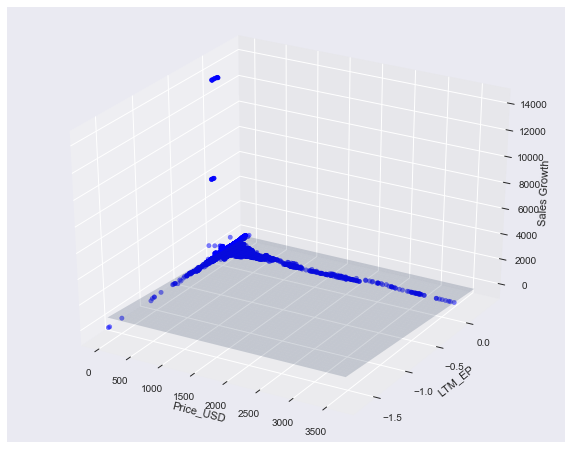

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_opt['Price_USD'],X_opt['LTM_EP'],y,c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf, fitted.values.reshape(x_surf.shape), alpha=0.2)
ax.set_xlabel('Price_USD')
ax.set_ylabel('LTM_EP')
ax.set_zlabel('Sales Growth')
plt.show()

#### The higher the number of features the less the likelihood of multiple linear regression to predict due to __curse of dimensionality__

In [33]:
X_opt = X_opt.drop('LTM_EP', axis=1)
